In [2]:
###Image Recognition with Trained Model
# Import the libraries
import numpy as np
# Importing os libraries so we can open folder on local storage
import os
# Import an object with methods to process image data
from keras.preprocessing import image

# Import the pre-trained model
from keras.models import Model
from keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

# We need to install libraries tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
myFile = "/content/drive/MyDrive/data1"
fullPath = os.path.abspath("/content/drive/MyDrive/data1")
data_for_processing = tf.keras.utils.get_file( fname= myFile,origin='file://'+fullPath)


In [4]:
# Preparing variables for keras model

img_height,img_width=180,180
batch_size=32
number_classes = 2

In [5]:
# Spliting our data set for training and test

# We split our data_for_processing and take 80% of available data and put it in train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,                          #               
  validation_split=0.3,                         # Optional float between 0 and 1, fraction of data to reserve for validation.  
  subset="training",                            # One of "training" or "validation". Only used if validation_split is set.
  seed=123,                                     # Optional random seed for shuffling and transformations.
  image_size=(img_height, img_width),           # Size to resize images to after they are read from disk. Defaults to (256, 256)
  batch_size=batch_size)                        # Size of the batches of data. Default: 32. If None, the data will not be batched

# We split our data_for_processing and take 20% of available data and put it in val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.
Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [6]:
# Getting names of our classes. In this model class names are names of folders contained in mask folder

class_names = train_ds.class_names

print(class_names)

['with_mask', 'without_mask']


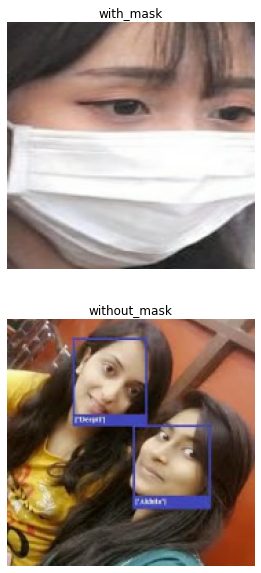

In [7]:
# Taking a look at our images in train_ds
# It show random images from our storage

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    # plt.subplot(Three integers (nrows, ncols, index).)
    plt.subplot(2, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
  

In [8]:
# Initializing Sequential() model to EfficientNetB2_model

EfficientNet_model = Sequential()

# Instantiates the EfficientNetB2 architecture.

pretrained_model= tf.keras.applications.EfficientNetB2(
                include_top=False,                              # Whether to include the fully-connected layer at the top of the network.
                input_shape=(img_height,img_width,3),           # Optional shape tuple, only to be specified if include_top is False
                pooling='avg',                                  # Optional pooling mode for feature extraction when include_top is False. avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
                classes=number_classes,                                      # Optional number of classes to classify images into, only to be specified if include_top is True
                weights='imagenet')                             # 'imagenet' (pre-training on ImageNet) None
for layer in pretrained_model.layers:
        layer.trainable=False
# Adding pre trained EfficientNetB2 model to our..
EfficientNet_model.add(pretrained_model)

31801344/31790344 [==============================] - 0s 0us/step


In [9]:
# Further prepering model
# Flattens the input
EfficientNet_model.add(layers.Flatten())
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the 
# element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.
# Relu  (Rectified Linear Unit) Activation Function 
EfficientNet_model.add(layers.Dense(512, activation='relu'))
# The sigmoid function is a mathematical logistic function. It is commonly used in statistics, audio signal processing, biochemistry, and the activation function in artificial neurons 
# where the probabilities of each value are proportional to the relative scale of each value in the vector.
# Output Shape 
EfficientNet_model.add(layers.Dense(1, activation='sigmoid'))


EfficientNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 1408)             7768569   
                                                                 
 flatten (Flatten)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 512)               721408    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 8,490,490
Trainable params: 721,921
Non-trainable params: 7,768,569
_________________________________________________________________


In [10]:
# Training a Model and Model Evaluation

# optimizer= Name of optimizer or optimizer instance. See tf.keras.optimizers.
# Adam(learning_rate=0.001) is optimizer we choose and imported
# loss = Loss function. Maybe be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses. 
## A loss function is any callable with the signature
# loss='binary_crossentropy
# metrics = List of metrics to be evaluated by the model during training and testing
#EfficientNet_model.compile(optimizer=Adam(learning_rate=0.001),loss=,metrics=['accuracy'])
EfficientNet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Training a model with train_ds and val_ds and giving epochs = 5 where 5 number of iterations of training
history = EfficientNet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
166/166 [==============================] - 805s 5s/step - loss: 0.0365 - accuracy: 0.9868 - val_loss: 0.0188 - val_accuracy: 0.9925
Epoch 2/5
166/166 [==============================] - 375s 2s/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 0.0162 - val_accuracy: 0.9947
Epoch 3/5
166/166 [==============================] - 378s 2s/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0188 - val_accuracy: 0.9912
Epoch 4/5
166/166 [==============================] - 389s 2s/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0221 - val_accuracy: 0.9925
Epoch 5/5
166/166 [==============================] - 382s 2s/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0206 - val_accuracy: 0.9925


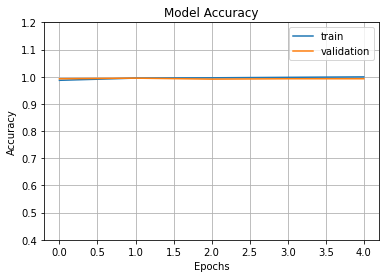

In [11]:
# Visualization of model metrics

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
# Saving the model and the weights
# resnet_model.save_weights("my_model_weights.h5")
EfficientNet_model.save("amrModel.h5")

In [50]:
# # Predicting image if person is wearing a mask or not

# # Formating picture to be apropriate for model to predict
# imageSize=[img_height,img_width]
# imageLocation = "./woman.jpg"
# predictImage = tf.keras.preprocessing.image.load_img(
#     imageLocation, 
#     target_size=imageSize
# )
# img_array = tf.keras.preprocessing.image.img_to_array(predictImage)
# # Expading dims again to apropriate for modelo
# img_array = tf.expand_dims(img_array, 0)

# # Making a prediction and dividing it with 255.0 to be able to represent likelihood in percentages
# predictions = EfficientNet_model.predict(img_array)

# score = predictions[0]

# print(score)

FileNotFoundError: ignored

In [ ]:
# predictImage 


In [ ]:
# # Presenting the prediction

# output_class=class_names[np.argmax(predictions)]
# print("The predicted class is", output_class)

In [ ]:
# # Presenting the likelihood in percentages

# notoutput_class = class_names[np.argmin(predictions)]

# if score[0] > score[1]:
#     print("Image " + imageLocation + " has " + str(score[0] * 100) + " % chance to be " + notoutput_class + ' and ' + str(score[1] * 100) + ' % chance to be ' + output_class )
# else:
#     print("Image " + imageLocation + " has " + str(score[1] * 100) + " % chance to be " + output_class + ' and ' + str(score[0] * 100) + ' % chance to  be ' + output_class )

In [ ]:
# import cv2

# img_height = 180
# img_width = 180

# image=cv2.imread('./woman.jpg')
# image2=cv2.imread('./w_mask.jpg')
# #cv2.imshow('image window', image)
# #cv2.waitKey(0)
# #cv2.destroyAllWindows()

# image_resized= cv2.resize(image2, (img_width,img_height))
# image2=np.expand_dims(image_resized,axis=0)

In [ ]:
# imageList = {
#     0 : './woman.jpg',
#     1 : './w_mask.jpg',
#     2 : './w_mask2.jpg',
#     3 : './metamask.jpg',
#     4 : './woman2.jpg'
# }

# class_names = train_ds.class_names

# for index, value in enumerate(imageList):
#     image_for =cv2.imread(imageList[value])
#     image_resized= cv2.resize(image_for, (img_width,img_height))
#     image_for=np.expand_dims(image_resized,axis=0)
#     pred=EfficientNet_model.predict(image_for)
#     output_class=class_names[np.argmax(pred)]
#     print("The predicted class is", output_class)